In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-01-13 03:36:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.16, 2404:f340:10:1800::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  30.2MB/s    in 4.7s    

2021-01-13 03:36:06 (30.2 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-01-13 03:36:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.16, 2404:f340:10:1800::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187

In [2]:
import os
import zipfile

# first zip file
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

# second zip file
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [3]:
# train-horse
train_horse_dir = os.path.join('/tmp/hourse-or-human/horses')
# train-human
train_human_dir = os.path.join('.tmp.hourse-or-human/humans')
# validation-horse
validation_horse_dir = os.path.join('/tmp/validation-hourse-or-human/horses')
# validation-human
validation_horse_dir = os.path.join('/tmp/validation-hourse-or-human/humans')

In [4]:
# build a model
import tensorflow as tf

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [7]:
# image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 5s 665ms/step - loss: 0.6893 - accuracy: 0.5350 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 5s 645ms/step - loss: 0.6882 - accuracy: 0.5195 - val_loss: 0.6851 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 5s 645ms/step - loss: 0.6860 - accuracy: 0.5617 - val_loss: 0.6805 - val_accuracy: 0.5938
Epoch 4/100
8/8 [==============================] - 6s 734ms/step - loss: 0.6876 - accuracy: 0.5628 - val_loss: 0.6778 - val_accuracy: 0.6719
Epoch 5/100
8/8 [==============================] - 5s 664ms/step - loss: 0.6828 - accuracy: 0.5284 - val_loss: 0.6774 - val_accuracy: 0.5117
Epoch 6/100
8/8 [==============================] - 5s 656ms/step - loss: 0.6773 - accuracy: 0.5684 - val_loss: 0.6741 - val_accuracy: 0.5273
Epoch 7/100
8/8 [==============================] - 5s 656ms/step - loss: 0.6739 - accuracy: 0.6118 - val_loss: 0.6648 - val_accuracy: 0.6133
Epoch 8/100
8

Epoch 59/100
8/8 [==============================] - 5s 650ms/step - loss: 0.4067 - accuracy: 0.8131 - val_loss: 1.4572 - val_accuracy: 0.5430
Epoch 60/100
8/8 [==============================] - 6s 728ms/step - loss: 0.4052 - accuracy: 0.8076 - val_loss: 1.1561 - val_accuracy: 0.5742
Epoch 61/100
8/8 [==============================] - 5s 639ms/step - loss: 0.4542 - accuracy: 0.7831 - val_loss: 0.8348 - val_accuracy: 0.6172
Epoch 62/100
8/8 [==============================] - 5s 637ms/step - loss: 0.4124 - accuracy: 0.7898 - val_loss: 1.2024 - val_accuracy: 0.5625
Epoch 63/100
8/8 [==============================] - 5s 652ms/step - loss: 0.4005 - accuracy: 0.8287 - val_loss: 0.9428 - val_accuracy: 0.5938
Epoch 64/100
8/8 [==============================] - 5s 659ms/step - loss: 0.4013 - accuracy: 0.8131 - val_loss: 0.8171 - val_accuracy: 0.6445
Epoch 65/100
8/8 [==============================] - 6s 735ms/step - loss: 0.4152 - accuracy: 0.7942 - val_loss: 1.0034 - val_accuracy: 0.6016
Epoch 

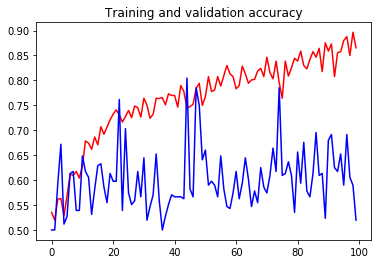

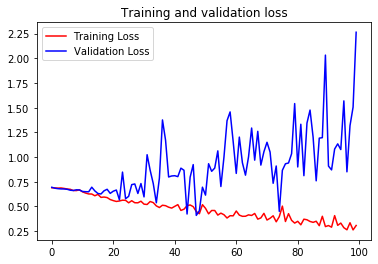

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import os, signal

os.kill(os.getpid(),signal.SIGKILL)